# ML Workflow - Data Preparation


---

In [1]:
import imblearn

In [103]:
# imports

import numpy as np
import pandas as pd
pd.options.mode.copy_on_write = True 
# https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt  

---

## Missing values

__scikit-learn__ estimators assume that all values in an array are numerical, and that all have and hold meaning!

In [104]:
# loading a classic!!!

iris = pd.read_csv('./iris-data.csv')
iris

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [105]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [106]:
iris.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [107]:
# categorical features

cols = ['class']

cat_list = []
for col in cols:
    cat = iris[col].unique()
    cat_num = len(cat)
    cat_dict = {"categorical_variable":col,
                "number_of_possible_values":cat_num,
                "values":cat}
    cat_list.append(cat_dict)
    
categories = pd.DataFrame(cat_list).sort_values(by="number_of_possible_values",
                                                ascending=False).reset_index(drop=True)
categories

,categorical_variable,number_of_possible_values,values
0,class,5,"[Iris-setosa, Iris-setossa, Iris-versicolor, v..."


In [108]:
# missing values

iris.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

In [109]:
# missing values percentage function

def missing_percentage(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_values_df = pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})
    return missing_values_df.reset_index(drop=True)

In [110]:
# missing values percentage

missing_percentage(iris)

,column_name,percent_missing
0,sepal_length_cm,0.000000
1,sepal_width_cm,0.000000
2,petal_length_cm,0.000000
3,petal_width_cm,3.333333
4,class,0.000000


### Outliers

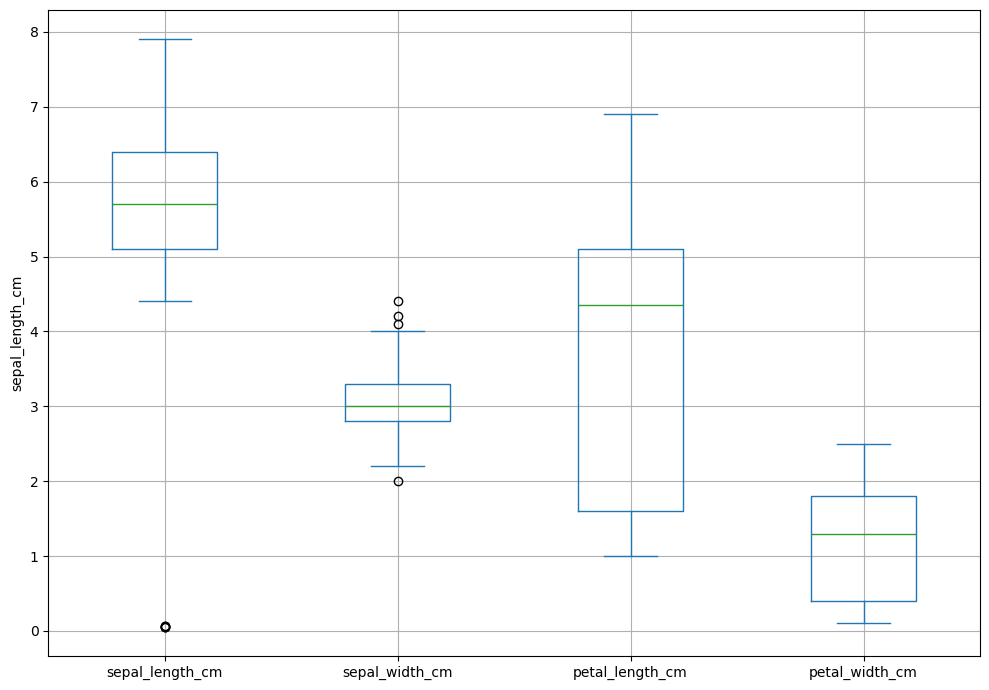

In [111]:
# Boxplot (Matplotlib whiskers implementation = 1.5 IQR)

data = iris
ax = data.plot.box(figsize=(10, 7))
ax.set_ylabel('sepal_length_cm')
#ax.boxplot(data, whis=[0, 100])
plt.tight_layout()
plt.grid()
plt.show()


In [133]:
sorted_iris = iris.sort_values(by='sepal_length_cm')
sorted_iris.head(10)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
81,0.055,2.4,3.7,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
77,0.067,3.0,5.0,1.7,Iris-versicolor
38,4.400,3.0,1.3,0.2,Iris-setosa
42,4.400,3.2,1.3,0.2,Iris-setosa
8,4.400,2.9,1.4,NaN,Iris-setosa
41,4.500,2.3,1.3,0.3,Iris-setosa
6,4.600,3.4,1.4,0.3,Iris-setosa


In [112]:
# Percentiles table (equal-count bins). Quartiles and Deciles are usually used.
percentages = [0.03,0.035,0.04,0.05]
percentiles = iris['sepal_length_cm'].quantile(percentages)
df = pd.DataFrame(percentiles)
df.index = [f'{int(p * 100)}%' for p in percentages]
df.transpose()



,3%,3%,4%,5%
sepal_length_cm,2.10351,4.4,4.4,4.445


In [113]:
sorted_iris = iris.sort_values(by='sepal_width_cm')
sorted_iris.head(10)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
60,5.000,2.0,3.5,1.0,Iris-versicolor
62,6.000,2.2,4.0,1.0,Iris-versicolor
119,6.000,2.2,5.0,1.5,Iris-virginica
68,6.200,2.2,4.5,1.5,Iris-versicolor
41,4.500,2.3,1.3,0.3,Iris-setosa
53,5.500,2.3,4.0,1.3,Iris-versicolor
93,5.000,2.3,3.3,1.0,Iris-versicolor
87,6.300,2.3,4.4,1.3,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor


In [114]:
sorted_iris.tail(10)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
46,5.1,3.8,1.6,0.2,Iris-setosa
44,5.1,3.8,1.9,0.4,Iris-setosa
18,5.7,3.8,1.7,0.3,Iris-setossa
19,5.1,3.8,1.5,0.3,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
16,5.4,3.9,1.3,0.4,Iris-setosa
14,5.8,4.0,1.2,0.2,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa
15,5.7,4.4,1.5,0.4,Iris-setosa


In [115]:
# Percentiles table (equal-count bins). Quartiles and Deciles are usually used.
percentages = [0.03,0.04,0.05, 0.1, 0.95,0.97,0.98,0.99]
percentiles = iris['sepal_width_cm'].quantile(percentages)
df = pd.DataFrame(percentiles)
df.index = [f'{int(p * 100)}%' for p in percentages]
df.transpose()



,3%,4%,5%,10%,95%,97%,98%,99%
sepal_width_cm,2.3,2.3,2.345,2.5,3.8,3.9,4.002,4.151


---

In [116]:
#Hay outliers en sepal_length_cm y sepal_width_cm. Podriamos eliminarlos 

### Delete Outliers values

In [131]:
percentil_1 = iris.sepal_length_cm .quantile(0.3)
percentil_2 = iris.sepal_width_cm.quantile(0.04)
percentil_3 = iris.sepal_width_cm.quantile(0.98)

iris_out = iris.query('sepal_length_cm>= @percentil_1 and sepal_width_cm <= @percentil_3 and sepal_width_cm >= @percentil_2')
iris_out

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
5,5.4,3.9,1.7,0.4,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
13,5.7,3.0,1.1,0.1,Iris-setosa
14,5.8,4.0,1.2,0.2,Iris-setosa
16,5.4,3.9,1.3,0.4,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
#son muchos datos los que eliminamos. por lo que solo vamos a elimnar los outliers de la primera columna ya que son realmente outliers muy lejanos al resto de la muetra

In [134]:

df_iris = iris[iris['sepal_length_cm'] >= 0.068]
df_iris

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Delete nan values

In [135]:
# drop rows

df_iris_no_nan_rows = df_iris.dropna()
df_iris_no_nan_rows

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [136]:
missing_percentage(df_iris_no_nan_rows)

,column_name,percent_missing
0,sepal_length_cm,0.0
1,sepal_width_cm,0.0
2,petal_length_cm,0.0
3,petal_width_cm,0.0
4,class,0.0


---

### Imputation of missing values

In [137]:
# Manual imputation

iris_input = df_iris.copy()
iris_input

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [138]:
# Using pandas -> Numeric continuous values

iris_input['petal_width_cm'] = iris_input['petal_width_cm'].replace(np.nan,df_iris['petal_width_cm'].mean())
#titanic_input['Age'] = titanic_input['Age'].replace(np.nan, titanic_input['Age'].mean())
missing_percentage(iris_input)

,column_name,percent_missing
0,sepal_length_cm,0.0
1,sepal_width_cm,0.0
2,petal_length_cm,0.0
3,petal_width_cm,0.0
4,class,0.0


In [139]:
iris_input

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
#decidimos esta opción ya que el rango no es muy amplio y así conseguimos no borrar más datos. 

In [140]:
imputer = imputer.fit(titanic_input[['Age']])
imputer.get_params(deep=True)
#type(imputer)

NameError: name 'imputer' is not defined

In [27]:
titanic_input['Age'] = imputer.transform(titanic_input[['Age']])
missing_percentage(titanic_input)

,column_name,percent_missing
0,PassengerId,0.000000
1,Survived,0.000000
2,Pclass,0.000000
3,Name,0.000000
4,Sex,0.000000
5,Age,0.000000
6,SibSp,0.000000
7,Parch,0.000000
8,Ticket,0.000000
9,Fare,0.000000


In [28]:
type(imputer.transform(titanic_input[['Age']]))

numpy.ndarray

In [29]:
# Using sklearn univariate feature imputation -> Categorical values

imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
imputer = imputer.fit(titanic_input[['Embarked']])
titanic_input['Embarked'] = imputer.transform(titanic_input[['Embarked']])
missing_percentage(titanic_input)

ValueError: 2

---

## Encoding Categorical Data

again, __scikit-learn__ estimators assume that all values in an array are numerical, and that all have and hold meaning!

__Very Important:__ Ordinal Data vs. Nominal Data


In [141]:
# first we get the categorical data
cat_cols = ['class']
df_iris_encoded = iris_input[cat_cols]
df_iris_encoded

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [142]:
cat_list = []
for col in cat_cols:
    cat = iris_input[col].unique()
    cat_num = len(cat)
    cat_dict = {"categorical_variable":col,
                "number_of_possible_values":cat_num,
                "values":cat}
    cat_list.append(cat_dict)
    
cat_df = pd.DataFrame(cat_list).sort_values(by="number_of_possible_values",
                                                ascending=False).reset_index(drop=True)
cat_df

,categorical_variable,number_of_possible_values,values
0,class,5,"[Iris-setosa, Iris-setossa, Iris-versicolor, v..."


In [143]:
iris_input['class'].unique()

array(['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'versicolor',
       'Iris-virginica'], dtype=object)

---

### Label encoding

In [144]:
encoding = {'Iris-setosa':1, 'Iris-setossa':1, 'Iris-versicolor':2,'versicolor':2,'Iris-virginica':3}
def ordinal_encoding(x):
    for key in encoding:
        if x == key:
            return encoding[key]

In [145]:
iris_input['class'] = iris_input['class'] .apply(ordinal_encoding)
iris_input

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,2.3,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [148]:
iris_input.to_csv('iris_input.csv', index=False)

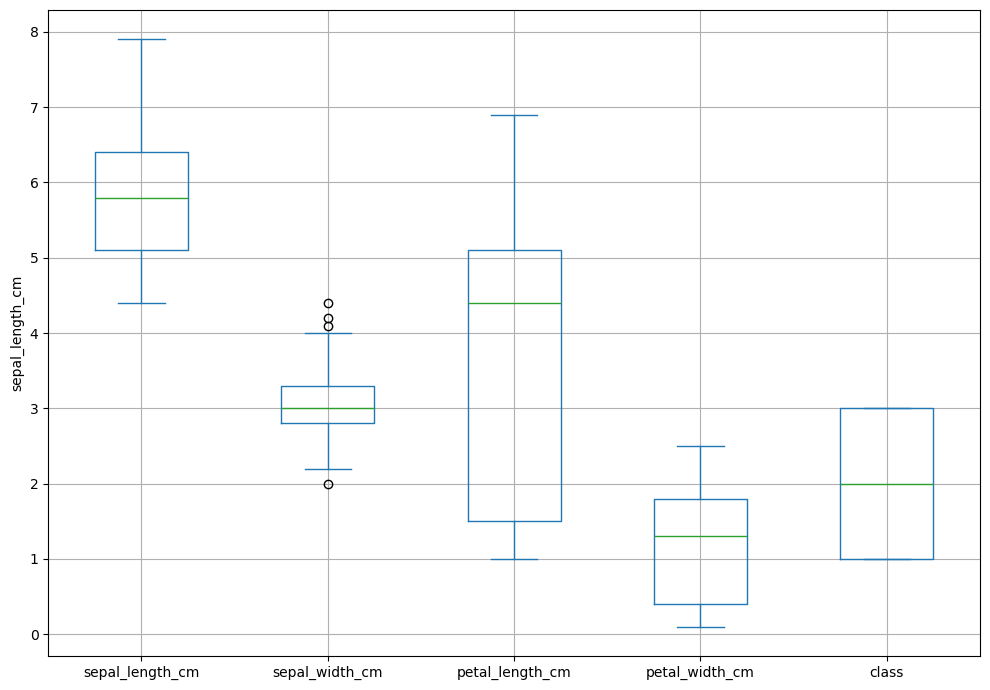

In [146]:
# Boxplot (Matplotlib whiskers implementation = 1.5 IQR)

data = iris_input
ax = data.plot.box(figsize=(10, 7))
ax.set_ylabel('sepal_length_cm')
#ax.boxplot(data, whis=[0, 100])
plt.tight_layout()
plt.grid()
plt.show()


---

__You can also use the [skalearn method](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) for it__

---

---